In [9]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit

In [10]:
@njit
def lattice_maker(lattice_size):
    lattice_array = 2*np.random.randint(0, 2, size=lattice_size) - 1

    return lattice_array

@njit
def E_spin(lattice_array, lattice_size, x):
    return -1 * lattice_array[x] * (lattice_array[(x + 1) % lattice_size] +
                                    lattice_array[(x - 1) % lattice_size])

In [26]:
@njit
def metropolis(lattice_size, T, n_ens):
    M_array = np.empty(n_ens)

    for ens in range(n_ens):
        lattice_array = lattice_maker(lattice_size)
        for _ in range(lattice_size**3):
            x = np.random.randint(0, lattice_size)

            dE = -2 * E_spin(lattice_array, lattice_size, x)

            if dE <= 0:
                lattice_array[x] *= -1
            elif np.random.random() < np.exp(-(dE/T)):
                lattice_array[x] *= -1
        
        M = np.abs(np.sum(lattice_array))
        M_array[ens] = M
    
    return np.mean(M_array)

In [21]:
T_array = np.linspace(0.01, 4, 40)

In [27]:
lattice_size = 128
n_ens = 25

M_array = []

for T in T_array:
    M = metropolis(lattice_size, T, n_ens)
    
    M_array.append(M)

In [28]:
M_array = [M/lattice_size for M in M_array]

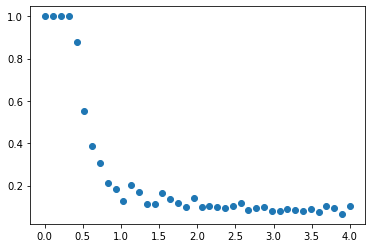

In [29]:
plt.scatter(T_array, M_array)